In [2]:
import numpy as np
import pandas as pd
import os
from PIL import Image, ImageDraw, ImageFont, ImageOps
import matplotlib.pyplot as plt
import seaborn as sns
import re
from shutil import copy2
import ast
import cv2

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.callbacks import ModelCheckpoint
import pocketsphinx

## Bag 1 : Classification Hijaiyah

### Labelling

In [3]:
with open('label_mapping.txt', 'r') as file:
    content = file.read()

# Find the positions of the two dictionaries
start1 = content.find('number_to_text')
end1 = content.find('}', start1) + 1
dict1_str = content[start1:end1]
number_to_text = ast.literal_eval(dict1_str.split('=')[1].strip())

start2 = content.find('lab_to_number')
end2 = content.find('}', start2) + 1
dict2_str = content[start2:end2]
lab_to_number = ast.literal_eval(dict2_str.split('=')[1].strip())

start3 = content.find('lab_to_text')
end3 = content.find('}', start3) + 1
dict3_str = content[start3:end3]
lab_to_text = ast.literal_eval(dict3_str.split('=')[1].strip())


### menambahkan data ter augmentasi

In [3]:
for label, text in lab_to_text.items():
# Load the original image
    img_path = f'example/{text}.jpg'
    img = load_img(img_path, color_mode='rgb')  # Change color_mode if necessary
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Create an ImageDataGenerator with augmentation options
    datagen = ImageDataGenerator(
        brightness_range=[0.2, 1.5],
        rotation_range=30,      # Meningkatkan rotation range
        shear_range=0.3,
        zoom_range=0.1,         # Menambahkan zoom range
        width_shift_range=0.1,  # Menambahkan width shift
        height_shift_range=0.1, # Menambahkan height shift
        fill_mode='nearest',    # Mode pengisian
        validation_split=0.2    # Split validation
    )

    # Generate 480 augmented images
    save_dir = f'data/augmented_images/{label}'
    os.makedirs(save_dir, exist_ok=True)

    i = 0
    for batch in datagen.flow(img_array, batch_size=1, save_to_dir=save_dir, save_prefix='aug', save_format='png'):
        i += 1
        if i >= 800:
            break

    print(f"800 augmented {text} images have been saved to the 'augmented_images' directory.")


800 augmented alif images have been saved to the 'augmented_images' directory.
800 augmented ba images have been saved to the 'augmented_images' directory.
800 augmented ta images have been saved to the 'augmented_images' directory.
800 augmented tsa images have been saved to the 'augmented_images' directory.
800 augmented jim images have been saved to the 'augmented_images' directory.
800 augmented ha images have been saved to the 'augmented_images' directory.
800 augmented kho images have been saved to the 'augmented_images' directory.
800 augmented dal images have been saved to the 'augmented_images' directory.
800 augmented dzal images have been saved to the 'augmented_images' directory.
800 augmented ra images have been saved to the 'augmented_images' directory.
800 augmented zai images have been saved to the 'augmented_images' directory.
800 augmented sin images have been saved to the 'augmented_images' directory.
800 augmented syin images have been saved to the 'augmented_images

### Memisahkan dataset sesuai label

In [ ]:
# memisahkan data di folder utama menjadi sub folder dengan warna tulisan hitam dan background putih
source_folder = r"C:\Users\gagah\Desktop\KKN\data\Train Images 13440x32x32\train"
destination_folder = r"C:\Users\gagah\Desktop\KKN\data\Data_Train_Images"

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)
file_list = [f for f in os.listdir(source_folder) if f.endswith(".jpg") or f.endswith(".png")]

for filename in file_list:
    match = re.search(r'id_(\d+)_label_(\d+)', filename)
    if match:
        img_id = match.group(1)
        label = match.group(2)
        
        # Membuat path folder label
        label_folder = os.path.join(destination_folder, f'lab_{label}')
        if not os.path.exists(label_folder):
            os.makedirs(label_folder)
        
        # Memuat dan menginversi gambar
        src_path = os.path.join(source_folder, filename)
        img = Image.open(src_path)
        img = ImageOps.invert(img)
        
        # Menyimpan gambar yang telah diubah ke folder tujuan dengan nama file baru
        dest_path = os.path.join(label_folder, f'id_{img_id}.png')
        img.save(dest_path)

### Menampilkan gambar dataset

Total data gambar: 775
Shape setiap gambar: (128, 128, 3)


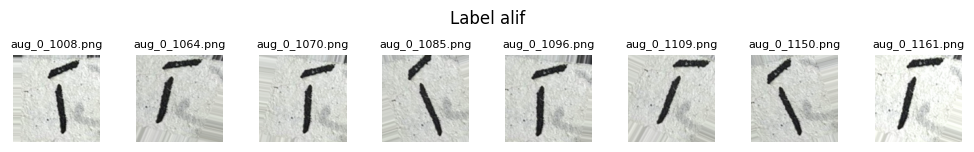

Total data gambar: 767
Shape setiap gambar: (128, 128, 3)


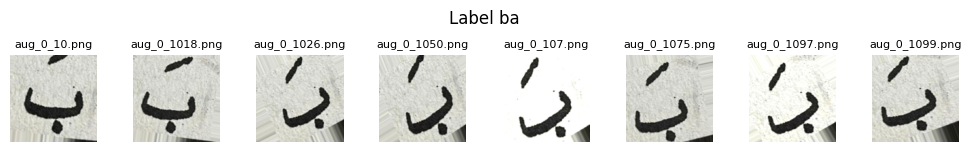

Total data gambar: 771
Shape setiap gambar: (128, 128, 3)


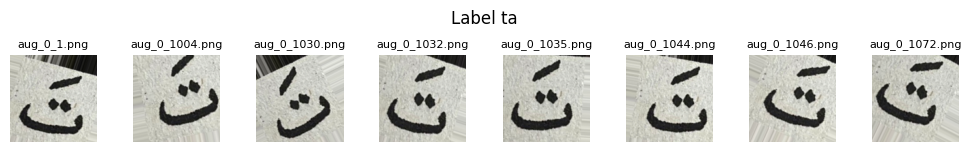

Total data gambar: 772
Shape setiap gambar: (128, 128, 3)


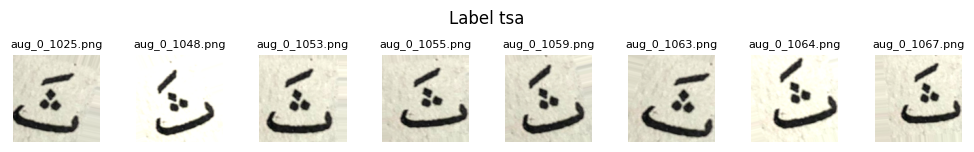

Total data gambar: 771
Shape setiap gambar: (128, 128, 3)


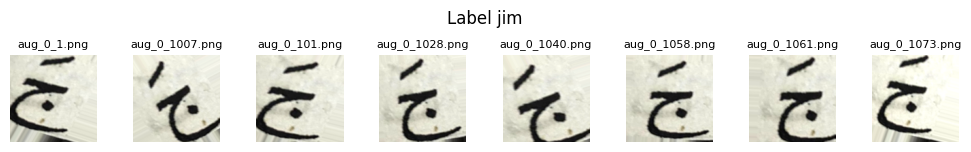

Total data gambar: 766
Shape setiap gambar: (128, 128, 3)


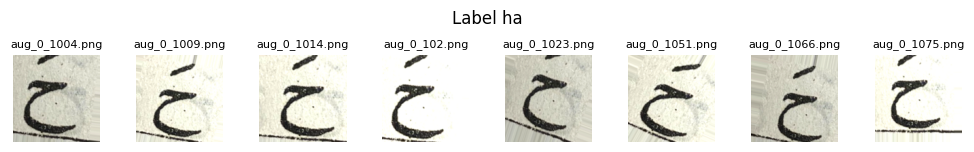

Total data gambar: 768
Shape setiap gambar: (128, 128, 3)


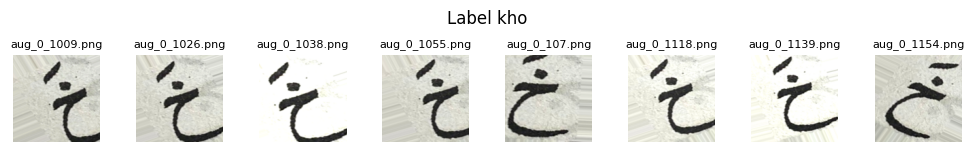

Total data gambar: 765
Shape setiap gambar: (128, 128, 3)


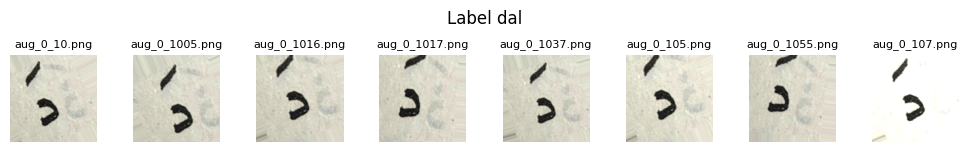

Total data gambar: 773
Shape setiap gambar: (128, 128, 3)


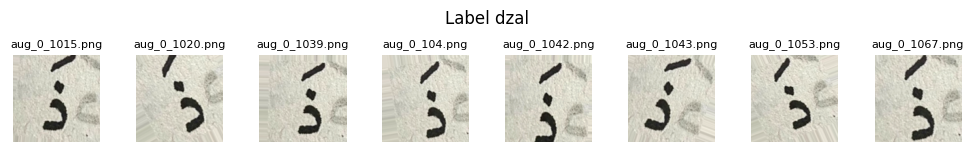

Total data gambar: 768
Shape setiap gambar: (128, 128, 3)


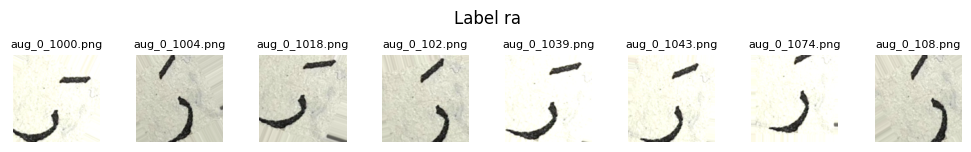

Total data gambar: 768
Shape setiap gambar: (128, 128, 3)


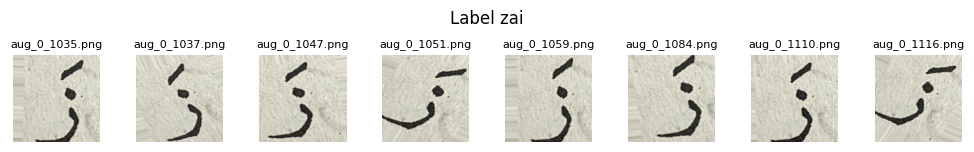

Total data gambar: 769
Shape setiap gambar: (128, 128, 3)


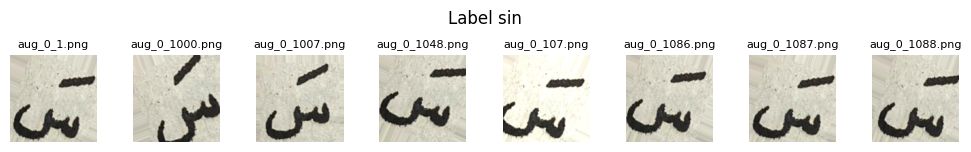

Total data gambar: 775
Shape setiap gambar: (128, 128, 3)


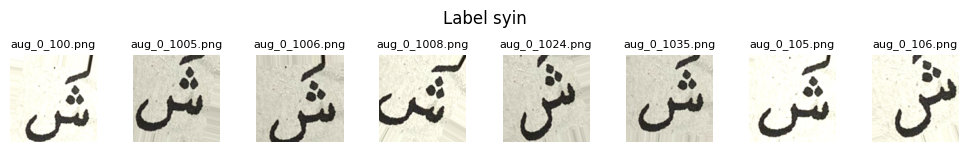

Total data gambar: 766
Shape setiap gambar: (128, 128, 3)


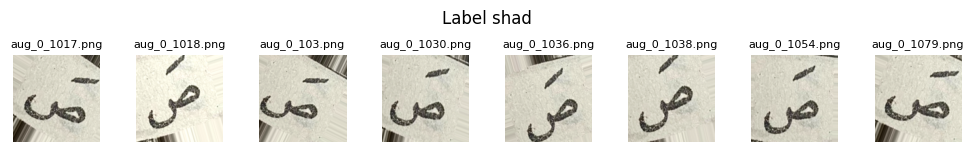

Total data gambar: 756
Shape setiap gambar: (128, 128, 3)


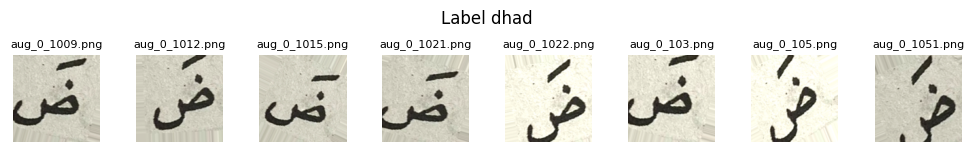

Total data gambar: 764
Shape setiap gambar: (128, 128, 3)


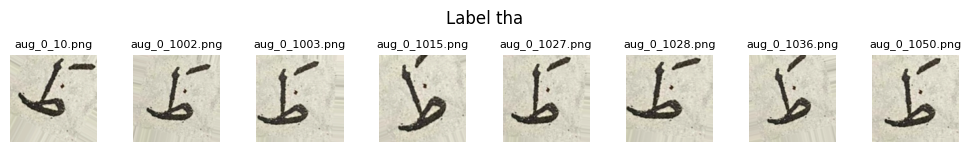

Total data gambar: 772
Shape setiap gambar: (128, 128, 3)


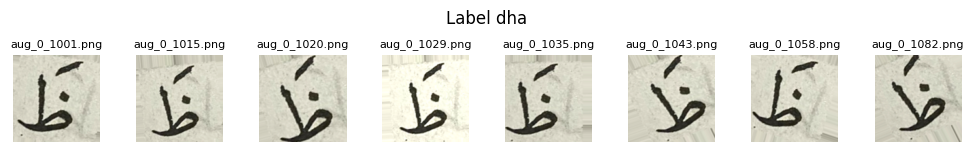

Total data gambar: 769
Shape setiap gambar: (128, 128, 3)


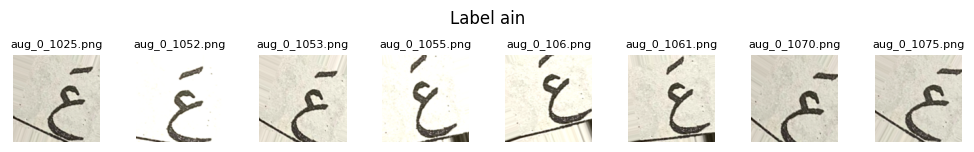

Total data gambar: 768
Shape setiap gambar: (128, 128, 3)


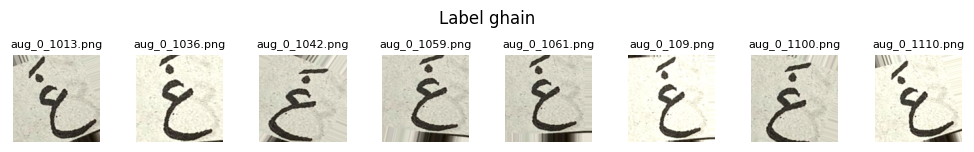

Total data gambar: 774
Shape setiap gambar: (128, 128, 3)


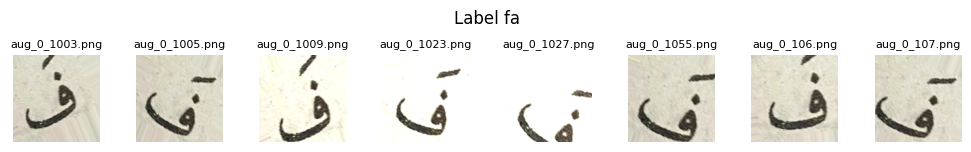

Total data gambar: 770
Shape setiap gambar: (128, 128, 3)


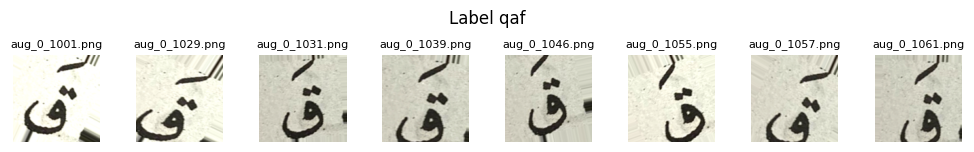

Total data gambar: 769
Shape setiap gambar: (128, 128, 3)


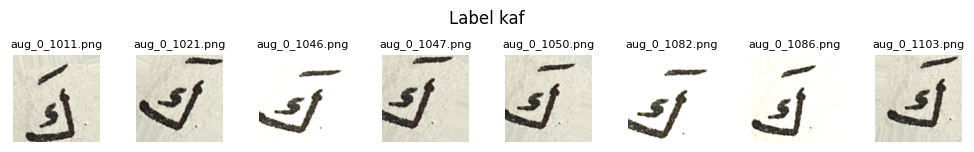

Total data gambar: 770
Shape setiap gambar: (128, 128, 3)


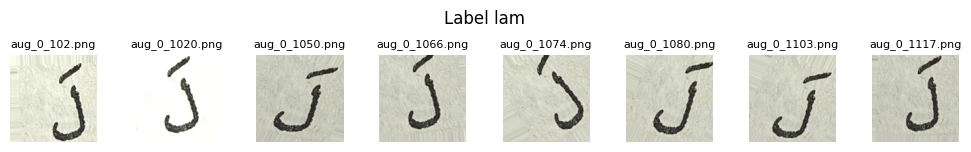

Total data gambar: 769
Shape setiap gambar: (128, 128, 3)


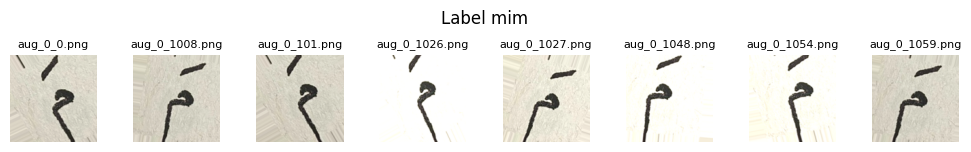

Total data gambar: 769
Shape setiap gambar: (128, 128, 3)


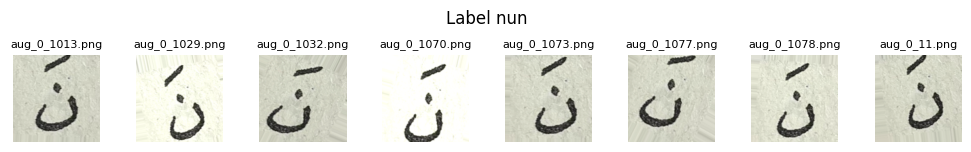

Total data gambar: 770
Shape setiap gambar: (128, 128, 3)


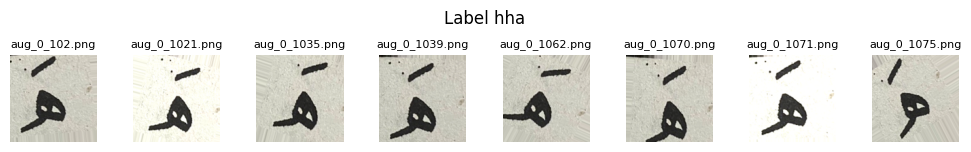

Total data gambar: 766
Shape setiap gambar: (128, 128, 3)


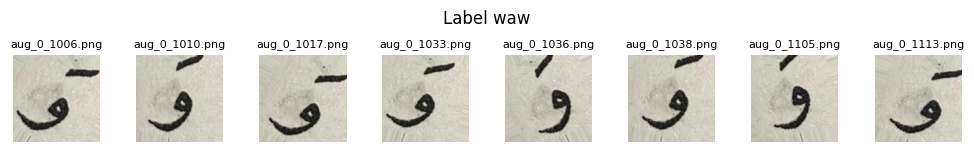

Total data gambar: 771
Shape setiap gambar: (128, 128, 3)


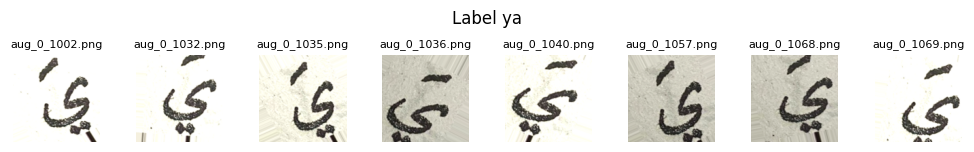

In [5]:
base_folder = r"data\augmented_images"
images_per_row = 8
size = 128

def extract_number(filename):
    match = re.search(r'_(\d+)', filename)
    return int(match.group(1)) if match else -1

folders = [f for f in os.listdir(base_folder)]
sorted_folders = sorted(folders, key=extract_number)

for label in sorted_folders:
    images_with_filenames = []
    
    label_directory = os.path.join(base_folder, label)
    file_list = [f for f in os.listdir(label_directory) if f.endswith(".png")]
    file_list.sort(key=extract_number)

    for filename in file_list:
        img_path = os.path.join(label_directory, filename)
        img = Image.open(img_path)
        img = img.resize((size, size))
        img_array = np.array(img)
        images_with_filenames.append((img_array, filename))

    images = np.array([img[0] for img in images_with_filenames])
    print(f'Total data gambar: {len(images)}')
    print(f'Shape setiap gambar: {images[0].shape}')

    # Plot the images
    fig, axes = plt.subplots(1, images_per_row, figsize=(10, 1.5))
    axes = axes.ravel()
    for i in range(8):
        axes[i].imshow(images_with_filenames[i][0], cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(images_with_filenames[i][1], fontsize=8)

    plt.suptitle(f'Label {lab_to_text[label]}')
    plt.tight_layout()
    plt.show()


### Membuat model DeepLearning

In [6]:
model_dir = 'model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90:
                print("\nReached 90% accuracy so cancelling training!")
                print(f"accuracy : {logs.get('accuracy') * 100:.2f}% \n"
                      f"val_acc : {logs.get('val_accuracy') * 100:.2f}% \n")
                self.model.stop_training = True
    
datagen = ImageDataGenerator(
    rescale=1./255,
    #horizontal_flip=True,
    #vertical_flip=True,
    brightness_range=[0.5, 1.5],
    rotation_range=5,      # Meningkatkan rotation range
    shear_range=0.1,
    zoom_range=0.1,         # Menambahkan zoom range
    width_shift_range=0.1,  # Menambahkan width shift
    height_shift_range=0.1, # Menambahkan height shift
    fill_mode='nearest',    # Mode pengisian
    validation_split=0.2    # Split validation
)

train_generator = datagen.flow_from_directory(
    directory=base_folder,
    target_size=(size, size),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training' 
)

validation_generator = datagen.flow_from_directory(
    directory=base_folder,
    target_size=(size, size),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation'
)

model = tf.keras.models.Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(size, size, 1)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(folders), activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(model_dir, 'model_3_{epoch:02d}_{accuracy:.2f}_{val_accuracy:.2f}.h5'), 
    monitor='val_accuracy',    # Metrik yang dipantau
    save_best_only=True,       # Hanya menyimpan model terbaik
    mode='max',                # Mode 'max' karena kita ingin akurasi maksimum
    verbose=1                  # Menampilkan log setiap kali model disimpan
)

Found 17236 images belonging to 28 classes.
Found 4295 images belonging to 28 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                   

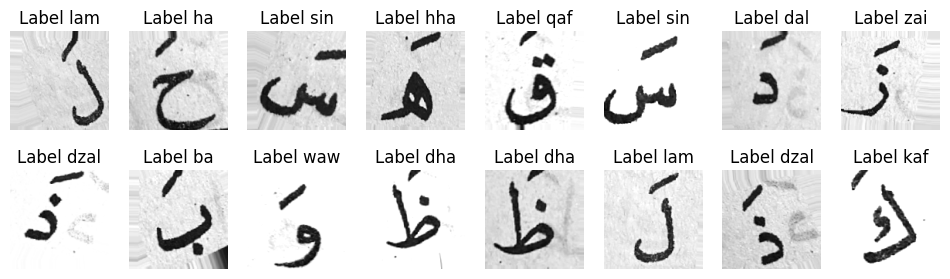

In [7]:
for images, labels in train_generator:
    plt.figure(figsize=(12, 3.3))
    for i in range(16):
        plt.subplot(2, 8, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label {number_to_text[labels[i].argmax()]}')
        plt.axis('off')
    plt.show()
    break

Epoch 1/100
539/539 [==============================] - ETA: 0s - loss: 1.6165 - accuracy: 0.5187
Epoch 1: val_accuracy improved from -inf to 0.92363, saving model to model\model_3_01_0.52_0.92.h5
539/539 [==============================] - 126s 232ms/step - loss: 1.6165 - accuracy: 0.5187 - val_loss: 0.2463 - val_accuracy: 0.9236
Epoch 2/100


c:\Users\gagah\Desktop\KKN\.conda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


539/539 [==============================] - ETA: 0s - loss: 0.1672 - accuracy: 0.9496
Epoch 2: val_accuracy improved from 0.92363 to 0.97043, saving model to model\model_3_02_0.95_0.97.h5

Reached 90% accuracy so cancelling training!
accuracy : 94.96% 
val_acc : 97.04% 

539/539 [==============================] - 123s 227ms/step - loss: 0.1672 - accuracy: 0.9496 - val_loss: 0.1022 - val_accuracy: 0.9704


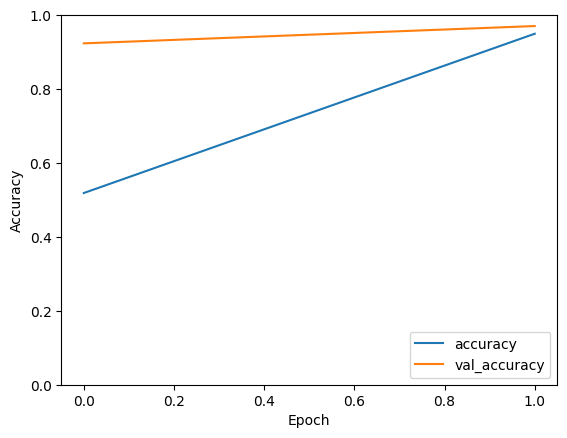

In [8]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback, myCallback()]
)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### Evaluation model

size = (128,128)
chanel = grayscale

673/673 [==============================] - 34s 49ms/step


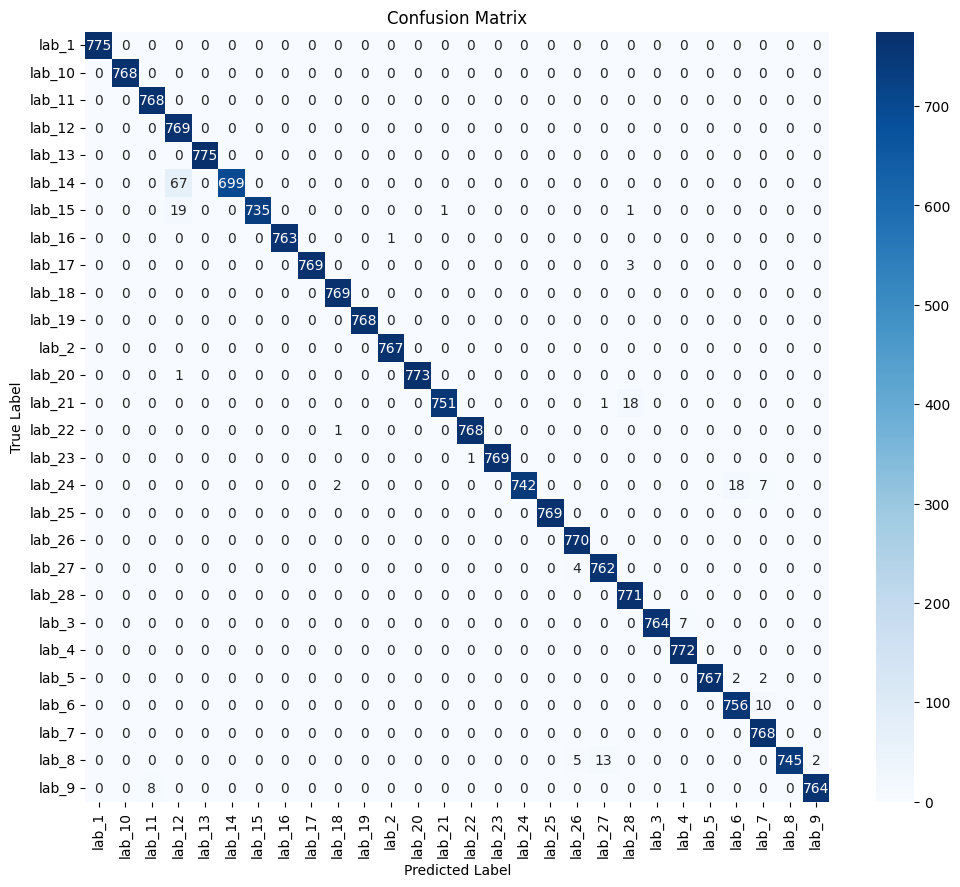

              precision    recall  f1-score   support

       lab_1       1.00      1.00      1.00       775
      lab_10       1.00      1.00      1.00       768
      lab_11       0.99      1.00      0.99       768
      lab_12       0.90      1.00      0.95       769
      lab_13       1.00      1.00      1.00       775
      lab_14       1.00      0.91      0.95       766
      lab_15       1.00      0.97      0.99       756
      lab_16       1.00      1.00      1.00       764
      lab_17       1.00      1.00      1.00       772
      lab_18       1.00      1.00      1.00       769
      lab_19       1.00      1.00      1.00       768
       lab_2       1.00      1.00      1.00       767
      lab_20       1.00      1.00      1.00       774
      lab_21       1.00      0.98      0.99       770
      lab_22       1.00      1.00      1.00       769
      lab_23       1.00      1.00      1.00       770
      lab_24       1.00      0.96      0.98       769
      lab_25       1.00    

In [9]:
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, color_mode='grayscale', target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

def load_images_from_folders(base_folder):
    images = []
    labels = []
    class_names = os.listdir(base_folder)
    
    for class_index, class_name in enumerate(class_names):
        class_folder = os.path.join(base_folder, class_name)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                if filename.endswith(".png"):
                    img_path = os.path.join(class_folder, filename)
                    img_array = load_and_preprocess_image(img_path)
                    images.append(img_array)
                    labels.append(class_index)
    
    images = np.vstack(images)  # Combine all images into one large array
    labels = np.array(labels)
    return images, labels, class_names

# Load the model
model = load_model('model/model_3_02_0.95_0.97.h5')

# Path to the dataset folder
base_folder = 'data/augmented_images'

# Load and preprocess images
images, true_labels, class_names = load_images_from_folders(base_folder)

# Predict the class
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Display confusion matrix with new labels
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report with new labels
print(classification_report(true_labels, predicted_classes, target_names=class_names))

1/1 [==============================] - 0s 68ms/step


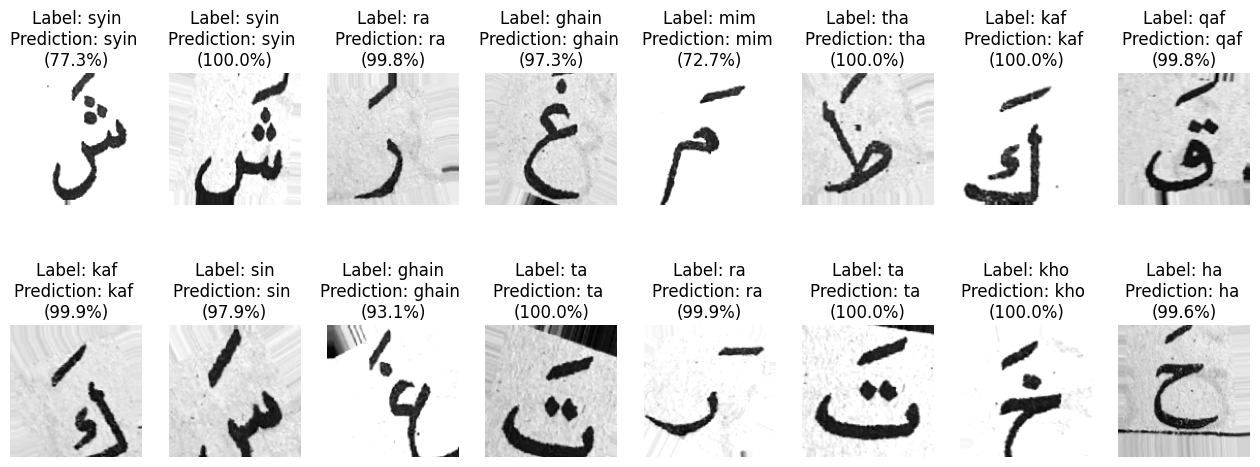

In [10]:
# Mengambil satu batch gambar dan label dari generator
for images, labels in train_generator:
    # Melakukan prediksi dengan model
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)

    # Membuat plot untuk menampilkan gambar dengan label asli dan prediksi
    plt.figure(figsize=(16, 6))
    for i in range(16):
        plt.subplot(2, 8, i+1)
        plt.imshow(images[i].reshape(images[i].shape[0], images[i].shape[1]), cmap='gray')
        plt.axis('off')        
        plt.title("Label: {}\nPrediction: {} \n({:.1f}%)".format(
        number_to_text[labels[i].argmax()], 
        number_to_text[predicted_classes[i]], 
        np.max(predictions[i])*100
    ))
    
    # Menampilkan plot
    plt.show()
    break


### coba pada data diluar dataset

1/1 [==============================] - 0s 124ms/step


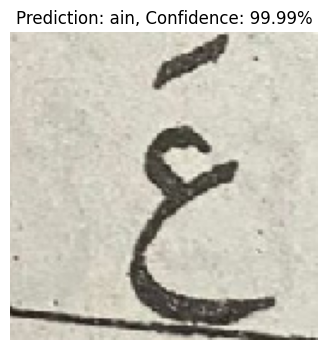

1/1 [==============================] - 0s 46ms/step


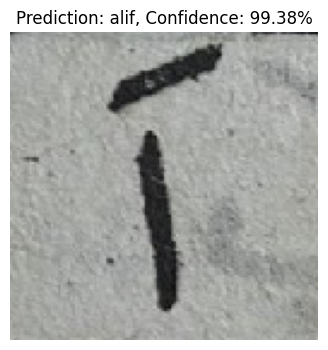

1/1 [==============================] - 0s 25ms/step


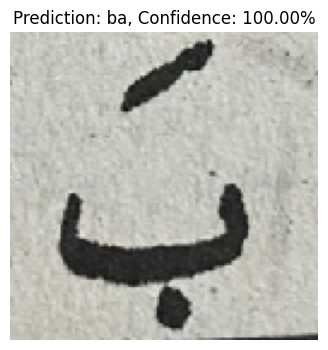

1/1 [==============================] - 0s 85ms/step


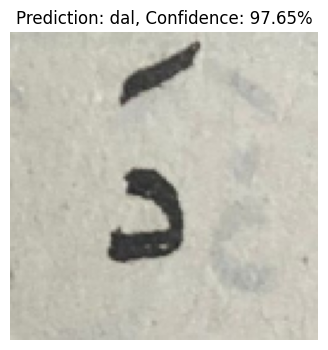

1/1 [==============================] - 0s 13ms/step


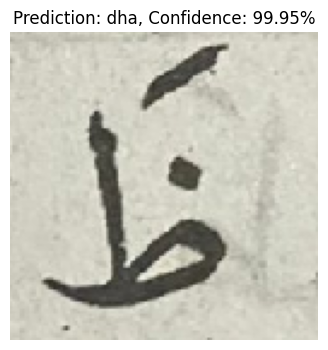

1/1 [==============================] - 0s 28ms/step


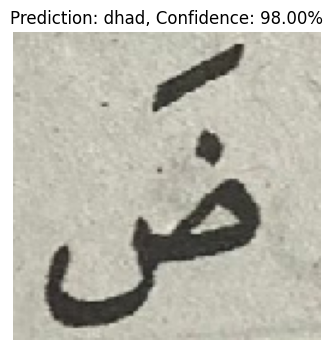

1/1 [==============================] - 0s 29ms/step


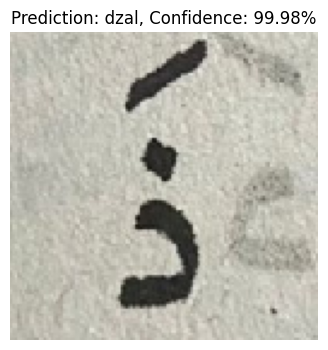

1/1 [==============================] - 0s 30ms/step


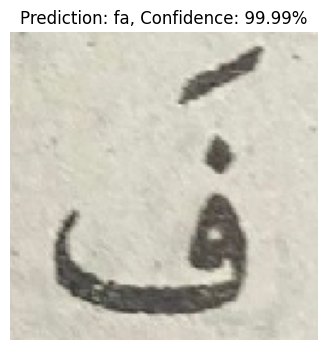

1/1 [==============================] - 0s 31ms/step


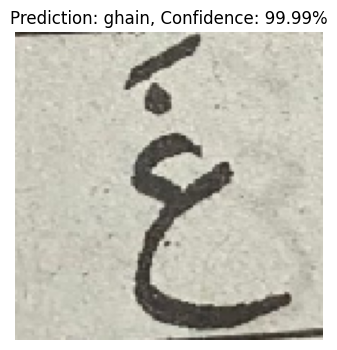

1/1 [==============================] - 0s 31ms/step


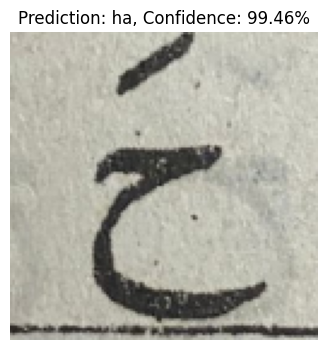

1/1 [==============================] - 0s 29ms/step


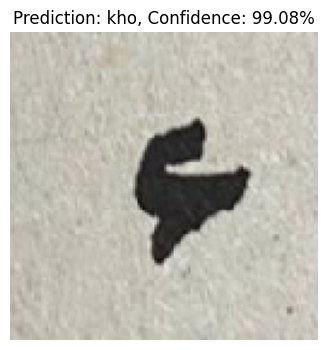

1/1 [==============================] - 0s 27ms/step


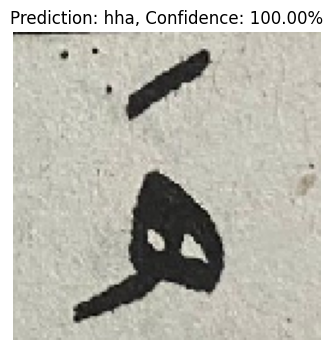

1/1 [==============================] - 0s 32ms/step


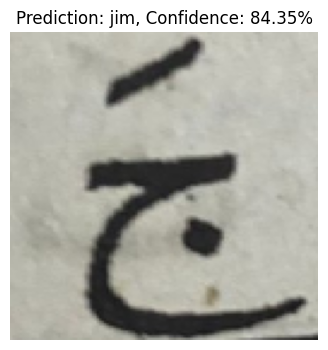

1/1 [==============================] - 0s 23ms/step


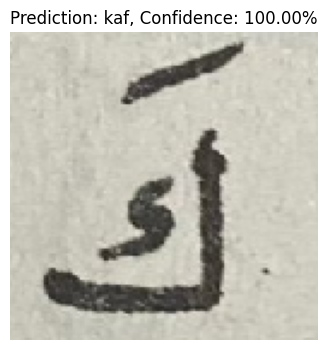

1/1 [==============================] - 0s 26ms/step


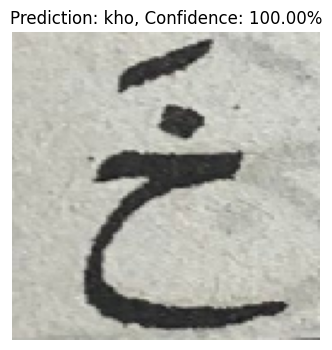

1/1 [==============================] - 0s 33ms/step


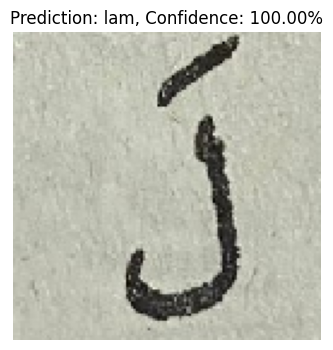

1/1 [==============================] - 0s 23ms/step


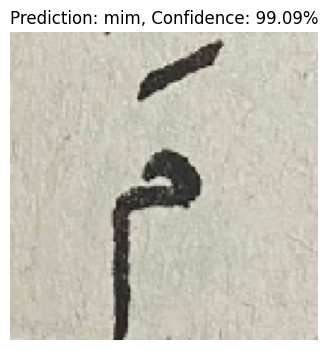

1/1 [==============================] - 0s 20ms/step


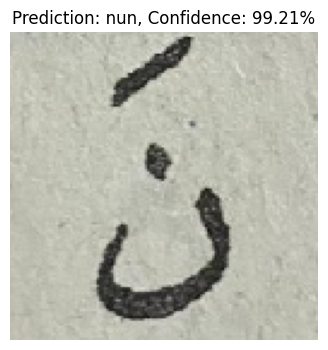

1/1 [==============================] - 0s 22ms/step


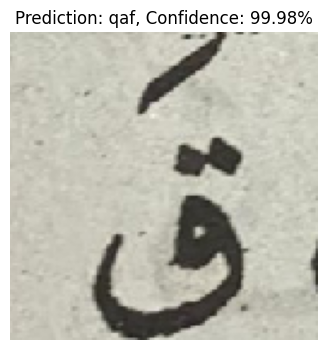

1/1 [==============================] - 0s 31ms/step


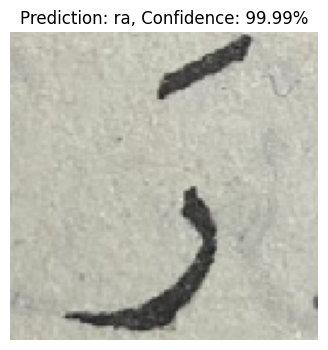

1/1 [==============================] - 0s 36ms/step


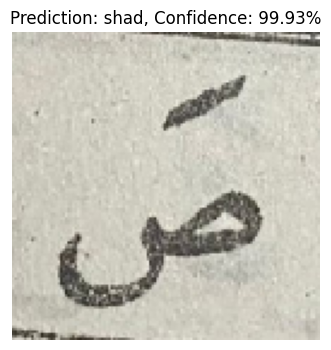

1/1 [==============================] - 0s 18ms/step


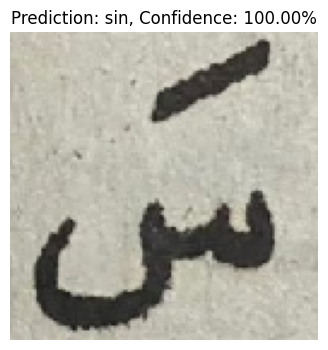

1/1 [==============================] - 0s 13ms/step


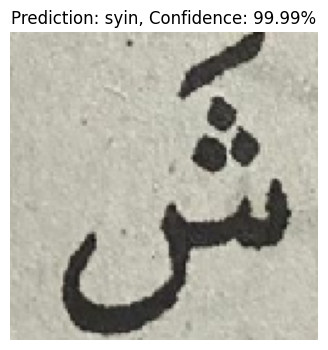

1/1 [==============================] - 0s 27ms/step


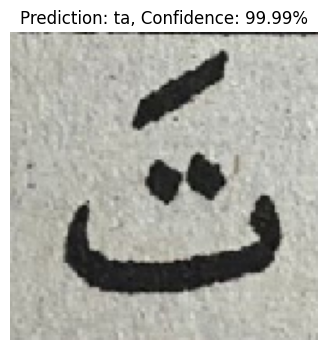

1/1 [==============================] - 0s 15ms/step


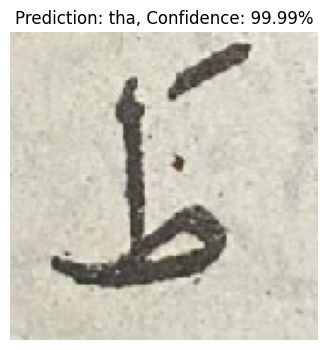

1/1 [==============================] - 0s 31ms/step


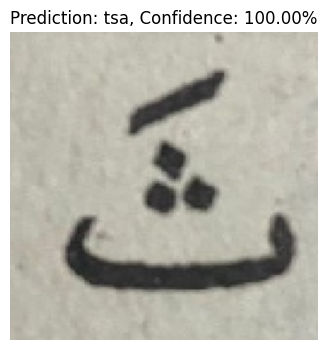

1/1 [==============================] - 0s 113ms/step


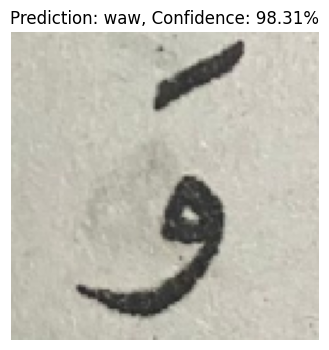

1/1 [==============================] - 0s 25ms/step


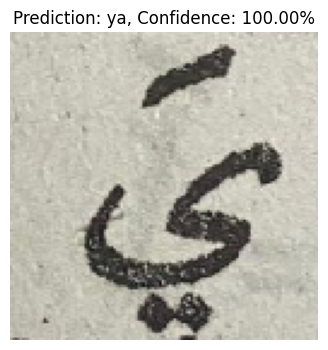

1/1 [==============================] - 0s 52ms/step


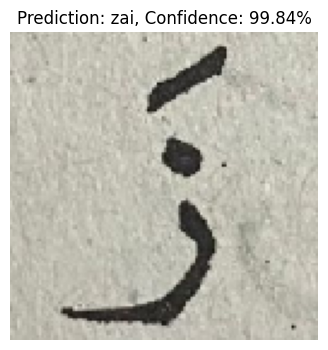

In [11]:
model = load_model('model/model_3_02_0.95_0.97.h5')

# Directory containing images
image_folder = 'example'
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.png', '.jpeg', '.jpg'))]

for image_file in image_files:
    img_array = load_and_preprocess_image(image_file)
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    img = load_img(image_file, target_size=(size, size), color_mode='rgb')

    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f'Prediction: {number_to_text[predicted_label]}, Confidence: {confidence:.2f}%')
    plt.axis('off')
    plt.show()


### Ubah model menjadi TfLite

In [ ]:
# Load model Keras (.h5)
model = tf.keras.models.load_model('model/model_2_28_0.93_0.91.h5')

# Konversi model ke format TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TensorFlow Lite (.tflite)
with open('model_2_28_0.93_0.91.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model berhasil dikonversi ke .tflite")